In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [2]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])

In [3]:
df_allmatch

,ID,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRD,AwayRD
0,6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
1,6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500,1500,0,0
2,6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500,1500,0,0
3,6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
4,6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594,1560,4,-6
4586,20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1515,1524,9,-13
4587,20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7
4588,20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0


In [4]:
df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10011354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,20.0,6.8,0.0,494.8,17.8,11.8,2.0,6.8,23.4,12.2,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78
20340810,12.2,4.0,0.2,537.2,11.6,14.2,1.0,3.6,21.8,14.2,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62


In [5]:
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)

↑は欠損値処理で20年のベガルタ(17位)とベルマーレ(18位)の真ん中あたりの数値を適当に入れたので,もっとロジック的に欠損値を割り出せば多少は的中率上がるかもしれない｡ ただ同じ下位チームでも戦術によってstatsが全然変わってくるので,論理的に欠損値を処理するのが難しい｡

ちなみに欠損値が出ているところは前年のJ1のstatsがないということなので,前年はJ2だったクラブということ｡(≒下位のクラブに相当する)また12年からstatsを取得できたため,12年の序盤までは例外的に欠損値

In [6]:
df_recent_stats.sort_index(inplace=True)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10010103,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10010908,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011007,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011229,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011354,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,11.2,3.4,0.0,471.8,15.4,10.4,2.4,3.0,24.6,9.2,...,19.0,2.4,2.2,0.0,0.2,64.0,24.4,115.2,16.08,54.30
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20343405,13.4,2.8,0.0,605.6,14.8,9.2,1.0,3.4,19.6,10.6,...,23.2,2.0,2.4,2.0,0.2,61.2,19.6,124.4,11.58,54.54


In [7]:
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

In [8]:
df_allmatch

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRD,AwayRD
ID,,,,,,,,,,,,,,,,
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,23607,1500,1500,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,17564,1500,1500,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,2,三協Ｆ柏,5137,1519,1682,6,-13
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,8,0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,17,7


In [9]:
df = pd.concat([df_allmatch, df_recent_stats], axis=1)

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.sort_index(inplace=True)

In [11]:
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,埼玉,...,18.8,1.6,1.8,1.0,0.0,46.4,13.8,123.8,11.02,53.80
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78


In [12]:
df_past=df['2016':'2018']

In [13]:
X_train=df_past[[ 'Sec','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                 'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate','AwayPossession']].values

In [14]:
y_train = df_past["W/L"].values

In [15]:
df_future = df['2019']

In [16]:
X_test=df_future[[ 'Sec','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                 'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate','AwayPossession']].values

In [17]:
y_test = df_future["W/L"].values

In [18]:
rf= RandomForestClassifier(max_depth=5)  
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_proba=rf.predict_proba(X_test)

In [19]:
rf.score(X_test,y_test)

0.43790849673202614

In [20]:
rf.feature_importances_

array([0.0162593 , 0.03119158, 0.02701601, 0.00438742, 0.03396427,
       0.0239601 , 0.02385023, 0.01448948, 0.0170997 , 0.02023317,
       0.02781822, 0.01755295, 0.01803704, 0.01108113, 0.0152433 ,
       0.01280543, 0.00447469, 0.05203407, 0.03939628, 0.01917466,
       0.02753222, 0.02892291, 0.03223133, 0.03225867, 0.00451413,
       0.06037704, 0.02061797, 0.01900302, 0.01424554, 0.01564137,
       0.01488129, 0.01645251, 0.02037105, 0.02675978, 0.02041458,
       0.01484937, 0.01207616, 0.0016064 , 0.07138241, 0.02229973,
       0.01707547, 0.03262739, 0.04379062])

In [21]:
len(rf.feature_importances_)

43

In [22]:
left = range(43)
height=rf.feature_importances_

label = ['Sec','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession']

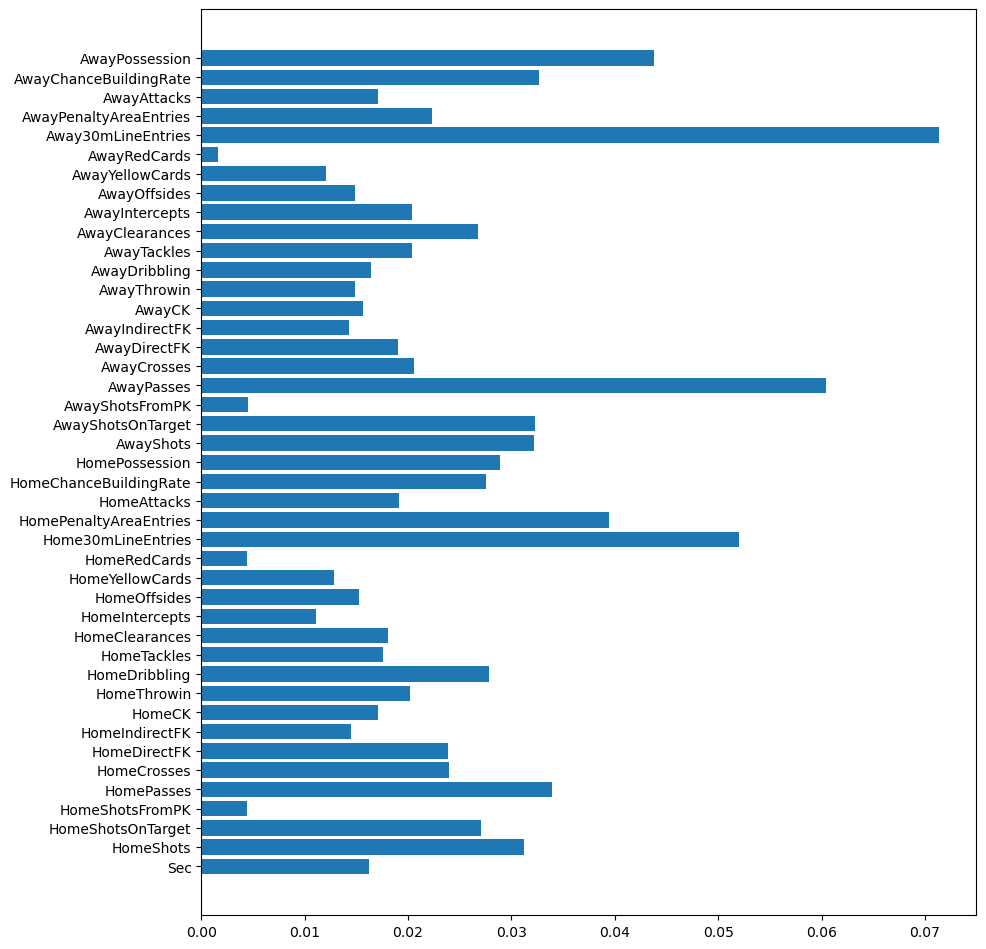

In [23]:
plt.figure(figsize=(10, 12), dpi=100)
plt.barh(left, height,tick_label=label, align="center")
plt.show()

---

In [24]:
accuracies = []
feature_imp_sum = np.zeros(40)

df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)
df_recent_stats.sort_index(inplace=True)

df = pd.concat([df_allmatch[["W/L","Date"]],df_recent_stats], axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.sort_index(inplace=True)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[[ 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[[ 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_test = df_future["W/L"].values


        rf= RandomForestClassifier(max_depth=5)  
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        y_pred_proba=rf.predict_proba(X_test)

        accuracy = rf.score(X_test,y_test) 
        accuracies.append(accuracy)
        
        feature_imp_sum = feature_imp_sum + rf.feature_importances_
        
print(f"的中率の平均値 : {np.mean(accuracies):.3f}")

的中率の平均値 : 0.450


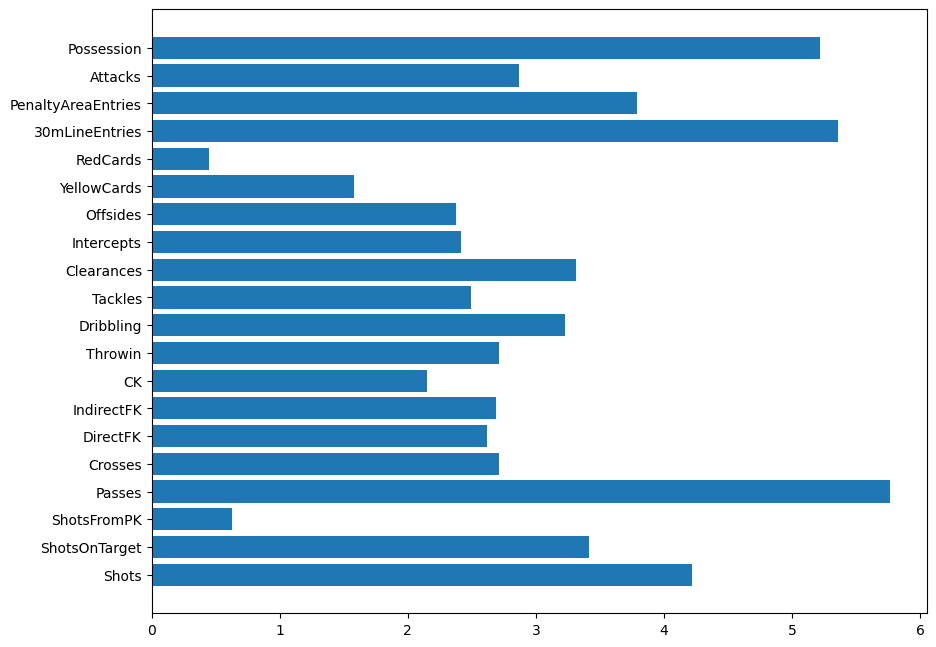

In [25]:
feature_imp_sum = feature_imp_sum[:20]+feature_imp_sum[20:]
left = range(20)
height=feature_imp_sum

label = ['Shots', 'ShotsOnTarget', 'ShotsFromPK','Passes', 'Crosses', 'DirectFK', 'IndirectFK', 'CK','Throwin', 'Dribbling', 'Tackles', 'Clearances',
       'Intercepts', 'Offsides', 'YellowCards', 'RedCards','30mLineEntries', 'PenaltyAreaEntries', 'Attacks', 'Possession']

plt.figure(figsize=(10, 8), dpi=100)
plt.barh(left, height,tick_label=label, align="center")
plt.show()

### 考察

以外にも過去5試合のスタッツだけでレーティングとほぼ同等の精度が出た｡ また､パス数､30m進入回数､ボール支配率あたりが重要度の高い特徴量になっている｡
これをレーティングと合わせて学習させたらどうなるか

### 今までのレーティングとレーティング差分を含めた値で検証

In [26]:
accuracies = []
calibrations = []
feature_imp_sum = np.zeros(45)

df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)
df_recent_stats.sort_index(inplace=True)

df = pd.concat([df_allmatch ,df_recent_stats], axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.sort_index(inplace=True)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[['Sec', 'HomeRate','HomeRate','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayRate','AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[['Sec', 'HomeRate','HomeRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayRate','AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_test = df_future["W/L"].values


        rf= RandomForestClassifier(max_depth=5)  
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        y_pred_proba=rf.predict_proba(X_test)

        accuracy = rf.score(X_test,y_test) 
        accuracies.append(accuracy)
        
        feature_imp_sum = feature_imp_sum + rf.feature_importances_
        
        
        count=0

        pred_winrate_sum=0 # 予測勝率の和
        actual_win_sum=0 # 実勝利数の和

        pred_drawrate_sum=0 # 予測引き分け率の和
        actual_draw_sum=0 # 実引き分け数の和

        pred_lossrate_sum=0 # 予測敗率の和
        actual_loss_sum=0 # 実敗北数の和

        for index,row in df_future.iterrows():
            # ホームが実力上位
            if row["HomeRate"] > row["AwayRate"]: 
                pred_winrate_sum += y_pred_proba[count][1] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][2]

                if y_test[count] == 1: 
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            # アウェイが実力上位
            elif row["AwayRate"] > row["HomeRate"]: 
                pred_winrate_sum += y_pred_proba[count][2] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][1]

                if y_test[count] == 2:
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            count+= 1

        
        calibration = pred_winrate_sum/actual_win_sum
        calibrations.append(calibration)

print(f"的中率の平均値 : {np.mean(accuracies):.3f}  較正値の平均値 : {np.mean(calibrations):.3f}")

的中率の平均値 : 0.457  較正値の平均値 : 0.913


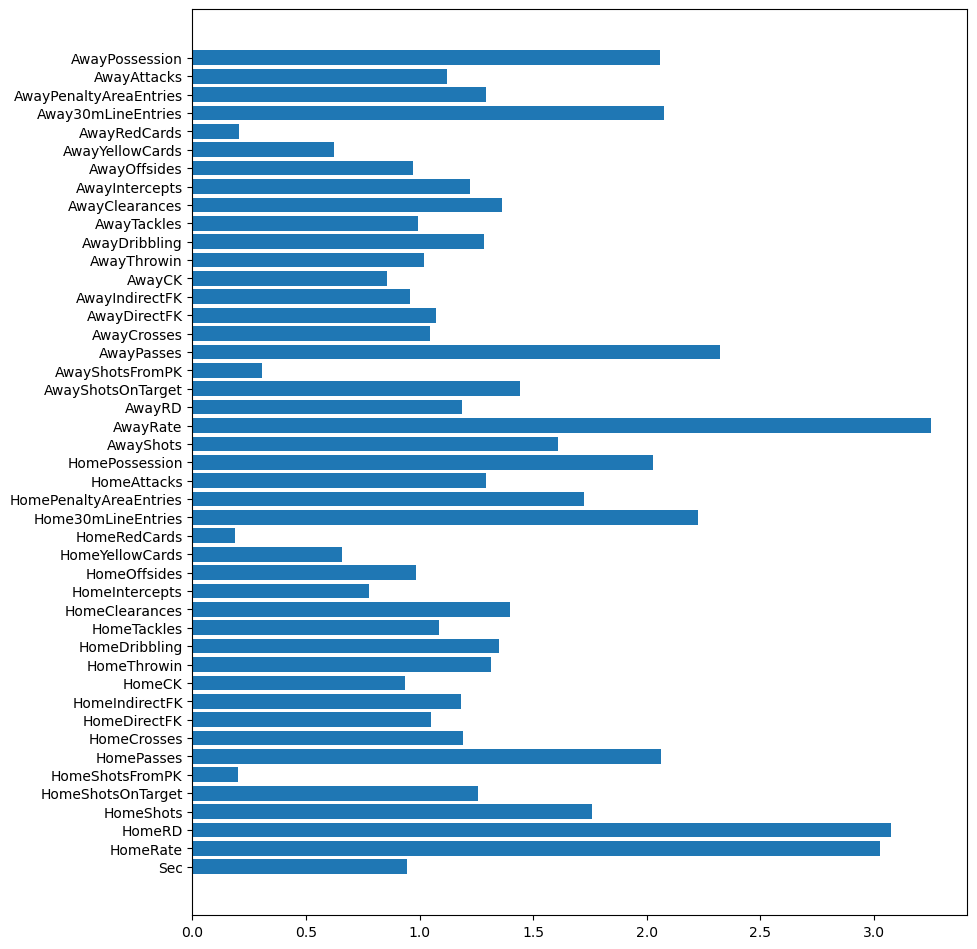

In [27]:
# feature_imp_sum = feature_imp_sum[:22]+feature_imp_sum[22:]
# left = range(22)
left = range(45)
height=feature_imp_sum

label = ['Sec', 'HomeRate','HomeRD','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayRate','AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']

plt.figure(figsize=(10, 12), dpi=100)
plt.barh(left, height,tick_label=label, align="center")
plt.show()

### 検証

レーティングも加えて検証したところ､レーティングは重要度としては高い｡がしかし､ぶっちゃけ精度は微増した程度｡
レーティングしか加えなかったときの予測精度とほぼ変わらない｡｡
単純に過去の数字持ってきて､食べさせて､だけでは精度が上がらない感じはする

In [28]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)
df_allmatch.insert(14, "RatingDiff", df_allmatch["HomeRate"]-df_allmatch["AwayRate"])

In [29]:
df_allmatch

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,RatingDiff,HomeRD,AwayRD
ID,,,,,,,,,,,,,,,,,
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,23607,1500,1500,0,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500,1500,0,0,0
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500,1500,0,0,0
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,17564,1500,1500,0,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500,1500,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,2,三協Ｆ柏,5137,1519,1682,-163,6,-13
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1540,1453,87,8,0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453,1458,-5,17,7


### Ratingを各々学習させるのではなく､Ratingの差分を使って学習

In [30]:
accuracies = []
calibrations = []
feature_imp_sum = np.zeros(44)

df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)
df_allmatch.insert(14, "RatingDiff", df_allmatch["HomeRate"]-df_allmatch["AwayRate"])

df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)
df_recent_stats.sort_index(inplace=True)

df = pd.concat([df_allmatch ,df_recent_stats], axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df = df.reset_index().set_index("Date")
df.rename(columns={'index': 'ID'}, inplace=True)

df.sort_index(inplace=True)

# print(df)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[['Sec','RatingDiff','HomeRD','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[[ 'Sec','RatingDiff','HomeRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']].values
        y_test = df_future["W/L"].values


        rf= RandomForestClassifier(max_depth=5)  
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        y_pred_proba=rf.predict_proba(X_test)

        accuracy = rf.score(X_test,y_test) 
        accuracies.append(accuracy)
        
        feature_imp_sum = feature_imp_sum + rf.feature_importances_
        
        
        count=0

        pred_winrate_sum=0 # 予測勝率の和
        actual_win_sum=0 # 実勝利数の和

        pred_drawrate_sum=0 # 予測引き分け率の和
        actual_draw_sum=0 # 実引き分け数の和

        pred_lossrate_sum=0 # 予測敗率の和
        actual_loss_sum=0 # 実敗北数の和

        for index,row in df_future.iterrows():
            # ホームが実力上位
            if row["HomeRate"] > row["AwayRate"]: 
                pred_winrate_sum += y_pred_proba[count][1] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][2]

                if y_test[count] == 1: 
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            # アウェイが実力上位
            elif row["AwayRate"] > row["HomeRate"]: 
                pred_winrate_sum += y_pred_proba[count][2] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][1]

                if y_test[count] == 2:
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            count+= 1

        
        calibration = pred_winrate_sum/actual_win_sum
        calibrations.append(calibration)
        
#         # 10ループ目の予測をpredict_probaをtoto予想に使用
#         df_y_pred_proba=pd.DataFrame(y_pred_proba)
#         df_y_pred_proba.insert(0,"MatchID",df_future["ID"].values)
#         df_y_pred_proba.to_csv(f"./predict_proba_data/{year}.csv", index=False)

print(f"的中率の平均値 : {np.mean(accuracies):.3f}  較正値の平均値 : {np.mean(calibrations):.3f}")

的中率の平均値 : 0.463  較正値の平均値 : 0.935


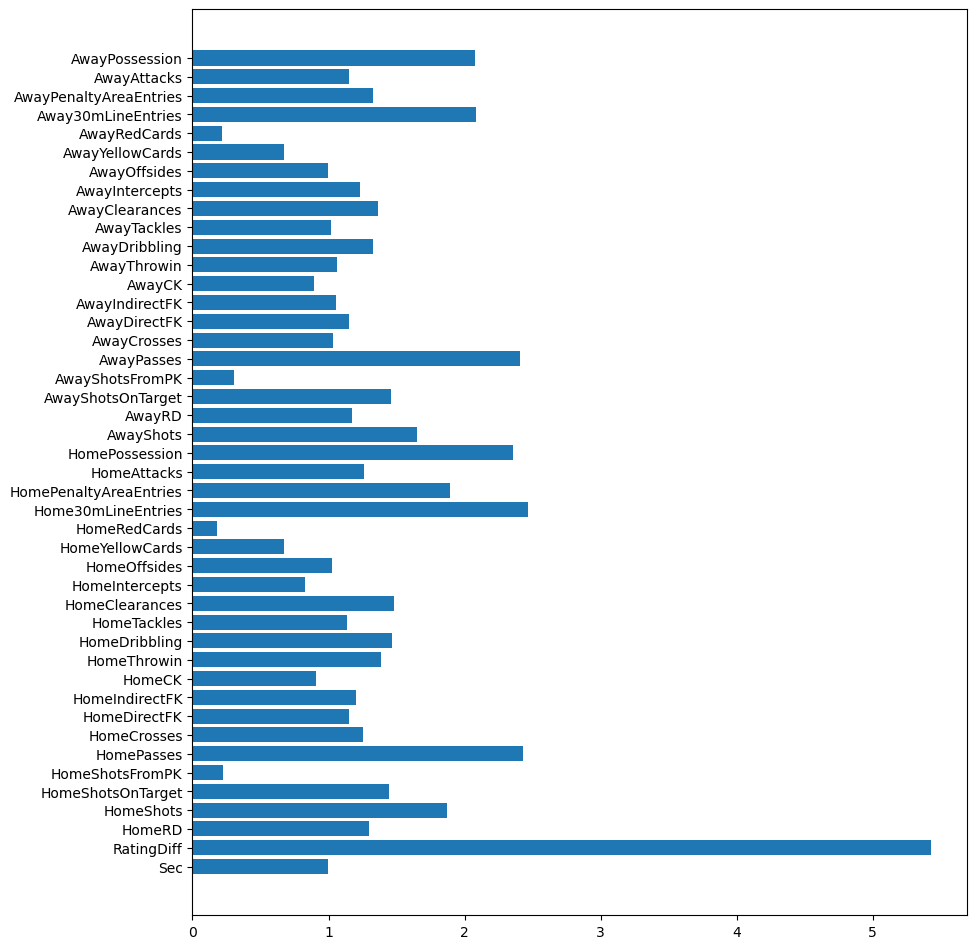

In [31]:
left = range(44)
height=feature_imp_sum

label = ['Sec','RatingDiff','HomeRD','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
                 'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
                 'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
                 'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
                 'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
                  'HomePossession', 'AwayShots',
                 'AwayRD','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
                 'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
                 'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
                 'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
                 'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayPossession']

plt.figure(figsize=(10, 12), dpi=100)
plt.barh(left, height,tick_label=label, align="center")
plt.show()

### すべてのstatsに対して対戦チーム間の差分を使って学習させる

In [32]:
df_allmatch = pd.read_csv("./match_data_yearly/all_years.csv")
df_allmatch["Date"] = pd.to_datetime(df_allmatch["Date"])
df_allmatch.set_index("ID",inplace=True)
df_allmatch.sort_index(inplace=True)

df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.sort_index(inplace=True)

df = pd.concat([df_allmatch ,df_recent_stats], axis=1)
df.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)

df = df[df['Year'] >= 2012]


df = df.reset_index().set_index("Date")
df.rename(columns={'index': 'ID'}, inplace=True)

df.sort_index(inplace=True)

In [33]:
df

,ID,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
Date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,12010807,2012,1,nagoya-grampus-eight,shimizu-s-pulse,8,7,1,0,1,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
2012-03-10,12010918,2012,1,gamba-osaka,vissel-kobe,9,18,2,3,2,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
2012-03-10,12011003,2012,1,sanfrecce-hiroshima,urawa-red-diamonds,10,3,1,0,1,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
2012-03-10,12011413,2012,1,consadole-sapporo,jubilo-iwata,14,13,0,0,0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
2012-03-10,12012178,2012,1,kawasaki-frontale,albirex-niigata,21,78,1,0,1,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,20340810,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
2020-12-19,20340314,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,...,18.8,1.6,1.8,1.0,0.0,46.4,13.8,123.8,11.02,53.80
2020-12-19,20340120,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78


In [34]:
len(df.columns)

58

In [35]:
items = ['Rate','RD','Shots', 'ShotsOnTarget', 'ShotsFromPK','Passes', 'Crosses', 'DirectFK', 'IndirectFK', 'CK','Throwin', 'Dribbling', 'Tackles', 'Clearances',
       'Intercepts', 'Offsides', 'YellowCards', 'RedCards','30mLineEntries', 'PenaltyAreaEntries', 'Attacks', 'Possession']

In [36]:
for item in items:
    df.insert(len(df.columns), f"{item}Diff", df[f"Home{item}"]-df[f"Away{item}"])

In [37]:
df

,ID,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,...,TacklesDiff,ClearancesDiff,InterceptsDiff,OffsidesDiff,YellowCardsDiff,RedCardsDiff,30mLineEntriesDiff,PenaltyAreaEntriesDiff,AttacksDiff,PossessionDiff
Date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,12010807,2012,1,nagoya-grampus-eight,shimizu-s-pulse,8,7,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2012-03-10,12010918,2012,1,gamba-osaka,vissel-kobe,9,18,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2012-03-10,12011003,2012,1,sanfrecce-hiroshima,urawa-red-diamonds,10,3,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2012-03-10,12011413,2012,1,consadole-sapporo,jubilo-iwata,14,13,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2012-03-10,12012178,2012,1,kawasaki-frontale,albirex-niigata,21,78,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,20340810,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,...,1.0,-6.4,-0.6,-2.4,-0.4,0.0,-8.6,-2.0,-9.4,-1.42
2020-12-19,20340314,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,...,1.2,2.2,-0.4,-0.6,0.2,0.0,-15.4,-2.0,-5.8,-4.94
2020-12-19,20340120,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,...,3.4,-2.6,1.4,1.4,0.4,0.2,13.6,2.2,10.6,5.40


In [38]:
df.columns

Index(['ID', 'Year', 'Sec', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF',
       'AwayGF', 'W/L', 'Stadium', 'Attendances', 'HomeRate', 'AwayRate',
       'HomeRD', 'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'RateDiff', 'R

In [39]:
accuracies = []
train_accuracies = []
calibrations = []
feature_imp_sum = np.zeros(22)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[['RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[['RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']].values
        y_test = df_future["W/L"].values


        rf= RandomForestClassifier(max_depth=3, n_estimators=400)  
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        y_pred_proba=rf.predict_proba(X_test)

        accuracy = rf.score(X_test,y_test) 
        train_accuracies.append(rf.score(X_train,y_train))
        accuracies.append(accuracy)
        
        feature_imp_sum = feature_imp_sum + rf.feature_importances_
        
        
        count=0

        pred_winrate_sum=0 # 予測勝率の和
        actual_win_sum=0 # 実勝利数の和

        pred_drawrate_sum=0 # 予測引き分け率の和
        actual_draw_sum=0 # 実引き分け数の和

        pred_lossrate_sum=0 # 予測敗率の和
        actual_loss_sum=0 # 実敗北数の和

        for index,row in df_future.iterrows():
            # ホームが実力上位
            if row["HomeRate"] > row["AwayRate"]: 
                pred_winrate_sum += y_pred_proba[count][1] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][2]

                if y_test[count] == 1: 
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            # アウェイが実力上位
            elif row["AwayRate"] > row["HomeRate"]: 
                pred_winrate_sum += y_pred_proba[count][2] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][1]

                if y_test[count] == 2:
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            count+= 1

        
        calibration = pred_winrate_sum/actual_win_sum
        calibrations.append(calibration)

squares = []
for c in calibrations:
    square = (1-c)**2
    squares.append(square)
    
    
print(f"的中率の平均値 : {np.mean(accuracies):.3f}  較正値と1の差分の2乗和の平均値 : {np.mean(squares):.5f}")
print(f"訓練データに対する的中率の平均値 : {np.mean(train_accuracies):.3f}")

的中率の平均値 : 0.460  較正値と1の差分の2乗和の平均値 : 0.01211
訓練データに対する的中率の平均値 : 0.524


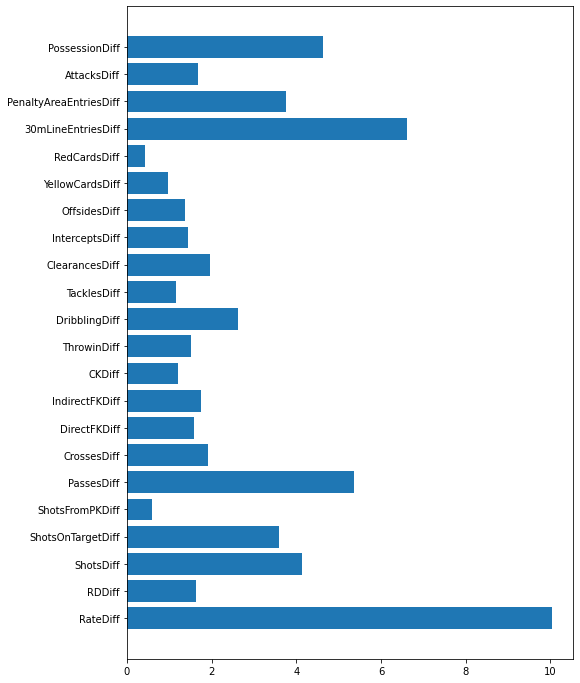

In [40]:
left = range(22)
height=feature_imp_sum

label = ['RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']

plt.figure(figsize=(8, 12))
plt.barh(left, height,tick_label=label, align="center")
plt.show()

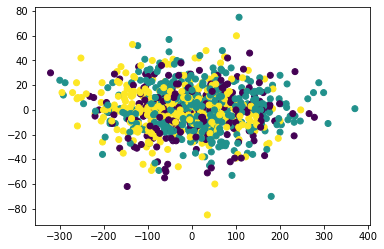

In [41]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

### 

In [84]:
accuracies = []
train_accuracies = []
calibrations = []
feature_imp_sum = np.zeros(70)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate',
       'HomeRD', 'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession','RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate',
       'HomeRD', 'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession','RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']].values
        y_test = df_future["W/L"].values


        rf= RandomForestClassifier(max_depth=3, n_estimators=400)  
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        y_pred_proba=rf.predict_proba(X_test)

        accuracy = rf.score(X_test,y_test) 
        train_accuracies.append(rf.score(X_train,y_train))
        accuracies.append(accuracy)
        
        feature_imp_sum = feature_imp_sum + rf.feature_importances_
        
        
        count=0

        pred_winrate_sum=0 # 予測勝率の和
        actual_win_sum=0 # 実勝利数の和

        pred_drawrate_sum=0 # 予測引き分け率の和
        actual_draw_sum=0 # 実引き分け数の和

        pred_lossrate_sum=0 # 予測敗率の和
        actual_loss_sum=0 # 実敗北数の和

        for index,row in df_future.iterrows():
            # ホームが実力上位
            if row["HomeRate"] > row["AwayRate"]: 
                pred_winrate_sum += y_pred_proba[count][1] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][2]

                if y_test[count] == 1: 
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            # アウェイが実力上位
            elif row["AwayRate"] > row["HomeRate"]: 
                pred_winrate_sum += y_pred_proba[count][2] 
                pred_drawrate_sum += y_pred_proba[count][0]
                pred_lossrate_sum += y_pred_proba[count][1]

                if y_test[count] == 2:
                    actual_win_sum += 1
                elif y_test[count] == 0:
                    actual_draw_sum += 1
                else:
                    actual_loss_sum += 1

            count+= 1

        
        calibration = pred_winrate_sum/actual_win_sum
        calibrations.append(calibration)

squares = []
for c in calibrations:
    square = (1-c)**2
    squares.append(square)
    
    
print(f"的中率の平均値 : {np.mean(accuracies):.3f}  較正値と1の差分の2乗和の平均値 : {np.mean(squares):.5f}")
print(f"訓練データに対する的中率の平均値 : {np.mean(train_accuracies):.3f}")

的中率の平均値 : 0.464  較正値と1の差分の2乗和の平均値 : 0.01315
訓練データに対する的中率の平均値 : 0.534


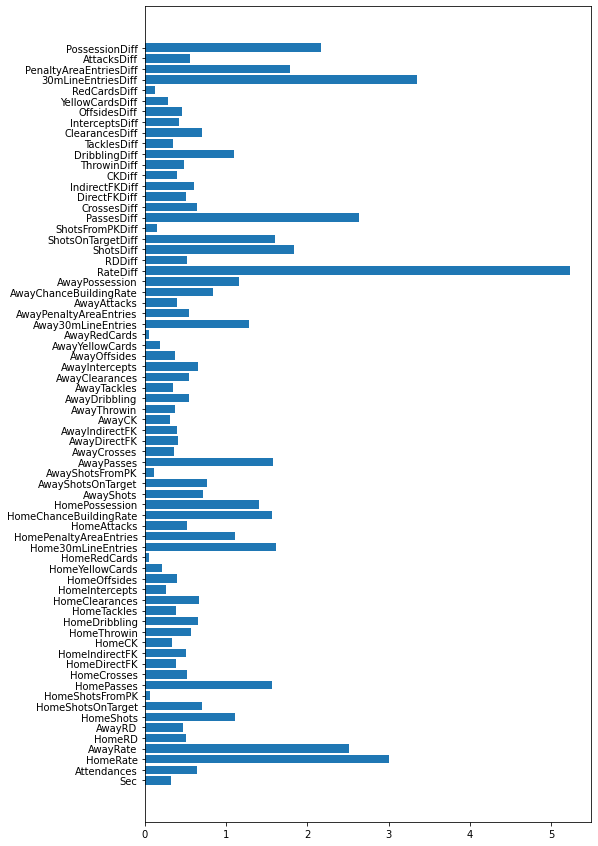

In [85]:
left = range(70)
height=feature_imp_sum

label = [ 'Sec', 'Attendances', 'HomeRate', 'AwayRate',
       'HomeRD', 'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession','RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']

plt.figure(figsize=(8, 15))
plt.barh(left, height,tick_label=label, align="center")
plt.show()

### 考察
精度の向上は刻む程度でほぼないに等しい

In [87]:
import lightgbm as lgb

In [93]:
accuracies = []
train_accuracies = []
calibrations = []
feature_imp_sum = np.zeros(70)

for _ in range(10):
    for year in (2015,2016,2017,2018,2019,2020):

        df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
        X_train=df_past[[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate',
       'HomeRD', 'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession','RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']].values
        y_train = df_past["W/L"].values

        df_future = df[f"{year}"]
        X_test=df_future[[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate',
       'HomeRD', 'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession','RateDiff', 'RDDiff', 'ShotsDiff',
       'ShotsOnTargetDiff', 'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff',
       'DirectFKDiff', 'IndirectFKDiff', 'CKDiff', 'ThrowinDiff',
       'DribblingDiff', 'TacklesDiff', 'ClearancesDiff', 'InterceptsDiff',
       'OffsidesDiff', 'YellowCardsDiff', 'RedCardsDiff', '30mLineEntriesDiff',
       'PenaltyAreaEntriesDiff', 'AttacksDiff', 'PossessionDiff']].values
        y_test = df_future["W/L"].values
        
        trains = lgb.Dataset(X_train, y_train)
        valids = lgb.Dataset(X_test, y_test)

        params = {
            "objective": "regression",
            "metrics": "mae"
        }
        
        model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100)


#         rf= RandomForestClassifier(max_depth=3, n_estimators=400)  
#         rf.fit(X_train,y_train)
#         y_pred = rf.predict(X_test)
#         y_pred_proba=rf.predict_proba(X_test)

#         accuracy = rf.score(X_test,y_test) 
#         train_accuracies.append(rf.score(X_train,y_train))
#         accuracies.append(accuracy)
        
#         feature_imp_sum = feature_imp_sum + rf.feature_importances_
    
    
print(f"的中率の平均値 : {np.mean(accuracies):.3f}")
print(f"訓練データに対する的中率の平均値 : {np.mean(train_accuracies):.3f}")

/home/yokoyama/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7179
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 70
[LightGBM] [Info] Start training from score 1.092593
[1]	valid_0's l1: 0.634366
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.630175
[3]	valid_0's l1: 0.629325
[4]	valid_0's l1: 0.632472
[5]	valid_0's l1: 0.634163
[6]	valid_0's l1: 0.636644
[7]	valid_0's l1: 0.639032
[8]	valid_0's l1: 0.637976
[9]	valid_0's l1: 0.638262
[10]	valid_0's l1: 0.638953
[11]	valid_0's l1: 0.64095
[12]	valid_0's l1: 0.643044
[13]	valid_0's l1: 0.646231
[14]	valid_0's l1: 0.648688
[15]	valid_0's l1: 0.648276
[16]	valid_0's l1: 0.650228
[17]	valid_0's l1: 0.654749
[18]	valid_0's l1: 0.658606
[19]	valid_0's l1: 0.660611
[20]	valid_0's l1: 0.659504
[21]	valid_0's l1: 0.661354
[22]	valid_0's l1

[89]	valid_0's l1: 0.653736
[90]	valid_0's l1: 0.654089
[91]	valid_0's l1: 0.653932
[92]	valid_0's l1: 0.653567
[93]	valid_0's l1: 0.653654
[94]	valid_0's l1: 0.653917
[95]	valid_0's l1: 0.654329
[96]	valid_0's l1: 0.65442
[97]	valid_0's l1: 0.654625
[98]	valid_0's l1: 0.655086
[99]	valid_0's l1: 0.655163
[100]	valid_0's l1: 0.655711
[101]	valid_0's l1: 0.655741
[102]	valid_0's l1: 0.655917
[103]	valid_0's l1: 0.65598
[104]	valid_0's l1: 0.655927
[105]	valid_0's l1: 0.655668
[106]	valid_0's l1: 0.655857
[107]	valid_0's l1: 0.656094
[108]	valid_0's l1: 0.656222
Early stopping, best iteration is:
[8]	valid_0's l1: 0.613798
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7378
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 70
[LightGBM] [Info] Start training from score 1.117647
[1]	valid_0's l1: 0.635892
T

[54]	valid_0's l1: 0.662395
[55]	valid_0's l1: 0.662413
[56]	valid_0's l1: 0.661752
[57]	valid_0's l1: 0.662286
[58]	valid_0's l1: 0.662509
[59]	valid_0's l1: 0.662532
[60]	valid_0's l1: 0.662791
[61]	valid_0's l1: 0.662214
[62]	valid_0's l1: 0.663256
[63]	valid_0's l1: 0.663356
[64]	valid_0's l1: 0.663985
[65]	valid_0's l1: 0.664238
[66]	valid_0's l1: 0.664521
[67]	valid_0's l1: 0.664442
[68]	valid_0's l1: 0.664169
[69]	valid_0's l1: 0.664734
[70]	valid_0's l1: 0.664674
[71]	valid_0's l1: 0.665021
[72]	valid_0's l1: 0.665229
[73]	valid_0's l1: 0.665064
[74]	valid_0's l1: 0.665466
[75]	valid_0's l1: 0.665847
[76]	valid_0's l1: 0.666186
[77]	valid_0's l1: 0.666096
[78]	valid_0's l1: 0.666963
[79]	valid_0's l1: 0.66756
[80]	valid_0's l1: 0.667186
[81]	valid_0's l1: 0.667021
[82]	valid_0's l1: 0.667236
[83]	valid_0's l1: 0.667113
[84]	valid_0's l1: 0.666932
[85]	valid_0's l1: 0.667084
[86]	valid_0's l1: 0.666818
[87]	valid_0's l1: 0.666449
[88]	valid_0's l1: 0.666471
[89]	valid_0's l1: 0.

[17]	valid_0's l1: 0.643014
[18]	valid_0's l1: 0.643526
[19]	valid_0's l1: 0.645507
[20]	valid_0's l1: 0.644144
[21]	valid_0's l1: 0.64364
[22]	valid_0's l1: 0.645208
[23]	valid_0's l1: 0.644486
[24]	valid_0's l1: 0.645036
[25]	valid_0's l1: 0.644753
[26]	valid_0's l1: 0.647609
[27]	valid_0's l1: 0.647001
[28]	valid_0's l1: 0.648738
[29]	valid_0's l1: 0.648884
[30]	valid_0's l1: 0.649137
[31]	valid_0's l1: 0.649761
[32]	valid_0's l1: 0.649496
[33]	valid_0's l1: 0.651025
[34]	valid_0's l1: 0.652579
[35]	valid_0's l1: 0.653056
[36]	valid_0's l1: 0.653682
[37]	valid_0's l1: 0.653013
[38]	valid_0's l1: 0.654402
[39]	valid_0's l1: 0.655008
[40]	valid_0's l1: 0.65496
[41]	valid_0's l1: 0.65515
[42]	valid_0's l1: 0.65551
[43]	valid_0's l1: 0.655324
[44]	valid_0's l1: 0.655576
[45]	valid_0's l1: 0.65589
[46]	valid_0's l1: 0.655962
[47]	valid_0's l1: 0.656515
[48]	valid_0's l1: 0.657765
[49]	valid_0's l1: 0.657667
[50]	valid_0's l1: 0.658151
[51]	valid_0's l1: 0.658575
[52]	valid_0's l1: 0.6594

[97]	valid_0's l1: 0.697343
[98]	valid_0's l1: 0.697637
[99]	valid_0's l1: 0.697655
[100]	valid_0's l1: 0.698091
[101]	valid_0's l1: 0.698643
[102]	valid_0's l1: 0.698837
[103]	valid_0's l1: 0.699082
Early stopping, best iteration is:
[3]	valid_0's l1: 0.629325
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7401
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 70
[LightGBM] [Info] Start training from score 1.101307
[1]	valid_0's l1: 0.637597
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.638061
[3]	valid_0's l1: 0.640024
[4]	valid_0's l1: 0.642325
[5]	valid_0's l1: 0.645419
[6]	valid_0's l1: 0.646987
[7]	valid_0's l1: 0.648093
[8]	valid_0's l1: 0.648574
[9]	valid_0's l1: 0.654314
[10]	valid_0's l1: 0.652229
[11]	valid_0's l1: 0.656162
[12]	valid_0's l1: 0.657317
[13]	v

[36]	valid_0's l1: 0.659383
[37]	valid_0's l1: 0.660113
[38]	valid_0's l1: 0.661341
[39]	valid_0's l1: 0.660922
[40]	valid_0's l1: 0.662614
[41]	valid_0's l1: 0.663924
[42]	valid_0's l1: 0.665237
[43]	valid_0's l1: 0.665259
[44]	valid_0's l1: 0.665051
[45]	valid_0's l1: 0.665196
[46]	valid_0's l1: 0.665467
[47]	valid_0's l1: 0.666702
[48]	valid_0's l1: 0.666816
[49]	valid_0's l1: 0.667442
[50]	valid_0's l1: 0.667143
[51]	valid_0's l1: 0.66709
[52]	valid_0's l1: 0.667498
[53]	valid_0's l1: 0.668061
[54]	valid_0's l1: 0.669153
[55]	valid_0's l1: 0.668472
[56]	valid_0's l1: 0.669541
[57]	valid_0's l1: 0.669464
[58]	valid_0's l1: 0.669615
[59]	valid_0's l1: 0.669215
[60]	valid_0's l1: 0.667934
[61]	valid_0's l1: 0.667359
[62]	valid_0's l1: 0.667634
[63]	valid_0's l1: 0.667301
[64]	valid_0's l1: 0.668233
[65]	valid_0's l1: 0.668421
[66]	valid_0's l1: 0.66865
[67]	valid_0's l1: 0.668529
[68]	valid_0's l1: 0.66904
[69]	valid_0's l1: 0.668971
[70]	valid_0's l1: 0.669687
[71]	valid_0's l1: 0.66

[103]	valid_0's l1: 0.667827
Early stopping, best iteration is:
[3]	valid_0's l1: 0.614977
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7368
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 70
[LightGBM] [Info] Start training from score 1.133987
[1]	valid_0's l1: 0.622498
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.619272
[3]	valid_0's l1: 0.617066
[4]	valid_0's l1: 0.616066
[5]	valid_0's l1: 0.616875
[6]	valid_0's l1: 0.61469
[7]	valid_0's l1: 0.615815
[8]	valid_0's l1: 0.613798
[9]	valid_0's l1: 0.615393
[10]	valid_0's l1: 0.617695
[11]	valid_0's l1: 0.618455
[12]	valid_0's l1: 0.618349
[13]	valid_0's l1: 0.618217
[14]	valid_0's l1: 0.618041
[15]	valid_0's l1: 0.621703
[16]	valid_0's l1: 0.622312
[17]	valid_0's l1: 0.624432
[18]	valid_0's l1: 0.62597
[19]	valid_

[43]	valid_0's l1: 0.655324
[44]	valid_0's l1: 0.655576
[45]	valid_0's l1: 0.65589
[46]	valid_0's l1: 0.655962
[47]	valid_0's l1: 0.656515
[48]	valid_0's l1: 0.657765
[49]	valid_0's l1: 0.657667
[50]	valid_0's l1: 0.658151
[51]	valid_0's l1: 0.658575
[52]	valid_0's l1: 0.65946
[53]	valid_0's l1: 0.659508
[54]	valid_0's l1: 0.659924
[55]	valid_0's l1: 0.660805
[56]	valid_0's l1: 0.661193
[57]	valid_0's l1: 0.661752
[58]	valid_0's l1: 0.662253
[59]	valid_0's l1: 0.661353
[60]	valid_0's l1: 0.661814
[61]	valid_0's l1: 0.662429
[62]	valid_0's l1: 0.661953
[63]	valid_0's l1: 0.662519
[64]	valid_0's l1: 0.661959
[65]	valid_0's l1: 0.662252
[66]	valid_0's l1: 0.662065
[67]	valid_0's l1: 0.662506
[68]	valid_0's l1: 0.662147
[69]	valid_0's l1: 0.662596
[70]	valid_0's l1: 0.662465
[71]	valid_0's l1: 0.662793
[72]	valid_0's l1: 0.662845
[73]	valid_0's l1: 0.66258
[74]	valid_0's l1: 0.663367
[75]	valid_0's l1: 0.663324
[76]	valid_0's l1: 0.662926
[77]	valid_0's l1: 0.662478
[78]	valid_0's l1: 0.66

[103]	valid_0's l1: 0.699082
Early stopping, best iteration is:
[3]	valid_0's l1: 0.629325
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7401
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 70
[LightGBM] [Info] Start training from score 1.101307
[1]	valid_0's l1: 0.637597
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.638061
[3]	valid_0's l1: 0.640024
[4]	valid_0's l1: 0.642325
[5]	valid_0's l1: 0.645419
[6]	valid_0's l1: 0.646987
[7]	valid_0's l1: 0.648093
[8]	valid_0's l1: 0.648574
[9]	valid_0's l1: 0.654314
[10]	valid_0's l1: 0.652229
[11]	valid_0's l1: 0.656162
[12]	valid_0's l1: 0.657317
[13]	valid_0's l1: 0.655299
[14]	valid_0's l1: 0.658041
[15]	valid_0's l1: 0.659296
[16]	valid_0's l1: 0.66189
[17]	valid_0's l1: 0.663539
[18]	valid_0's l1: 0.667123
[19]	valid

[49]	valid_0's l1: 0.667442
[50]	valid_0's l1: 0.667143
[51]	valid_0's l1: 0.66709
[52]	valid_0's l1: 0.667498
[53]	valid_0's l1: 0.668061
[54]	valid_0's l1: 0.669153
[55]	valid_0's l1: 0.668472
[56]	valid_0's l1: 0.669541
[57]	valid_0's l1: 0.669464
[58]	valid_0's l1: 0.669615
[59]	valid_0's l1: 0.669215
[60]	valid_0's l1: 0.667934
[61]	valid_0's l1: 0.667359
[62]	valid_0's l1: 0.667634
[63]	valid_0's l1: 0.667301
[64]	valid_0's l1: 0.668233
[65]	valid_0's l1: 0.668421
[66]	valid_0's l1: 0.66865
[67]	valid_0's l1: 0.668529
[68]	valid_0's l1: 0.66904
[69]	valid_0's l1: 0.668971
[70]	valid_0's l1: 0.669687
[71]	valid_0's l1: 0.6698
[72]	valid_0's l1: 0.669838
[73]	valid_0's l1: 0.670243
[74]	valid_0's l1: 0.670109
[75]	valid_0's l1: 0.669725
[76]	valid_0's l1: 0.669606
[77]	valid_0's l1: 0.669648
[78]	valid_0's l1: 0.669527
[79]	valid_0's l1: 0.669151
[80]	valid_0's l1: 0.66922
[81]	valid_0's l1: 0.668852
[82]	valid_0's l1: 0.668701
[83]	valid_0's l1: 0.668628
[84]	valid_0's l1: 0.66868

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7368
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 70
[LightGBM] [Info] Start training from score 1.133987
[1]	valid_0's l1: 0.622498
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.619272
[3]	valid_0's l1: 0.617066
[4]	valid_0's l1: 0.616066
[5]	valid_0's l1: 0.616875
[6]	valid_0's l1: 0.61469
[7]	valid_0's l1: 0.615815
[8]	valid_0's l1: 0.613798
[9]	valid_0's l1: 0.615393
[10]	valid_0's l1: 0.617695
[11]	valid_0's l1: 0.618455
[12]	valid_0's l1: 0.618349
[13]	valid_0's l1: 0.618217
[14]	valid_0's l1: 0.618041
[15]	valid_0's l1: 0.621703
[16]	valid_0's l1: 0.622312
[17]	valid_0's l1: 0.624432
[18]	valid_0's l1: 0.62597
[19]	valid_0's l1: 0.625236
[20]	valid_0's l1: 0.625138
[21]	valid_0's l1: 0.626361
[22]	valid_0's l1:

[60]	valid_0's l1: 0.661814
[61]	valid_0's l1: 0.662429
[62]	valid_0's l1: 0.661953
[63]	valid_0's l1: 0.662519
[64]	valid_0's l1: 0.661959
[65]	valid_0's l1: 0.662252
[66]	valid_0's l1: 0.662065
[67]	valid_0's l1: 0.662506
[68]	valid_0's l1: 0.662147
[69]	valid_0's l1: 0.662596
[70]	valid_0's l1: 0.662465
[71]	valid_0's l1: 0.662793
[72]	valid_0's l1: 0.662845
[73]	valid_0's l1: 0.66258
[74]	valid_0's l1: 0.663367
[75]	valid_0's l1: 0.663324
[76]	valid_0's l1: 0.662926
[77]	valid_0's l1: 0.662478
[78]	valid_0's l1: 0.661874
[79]	valid_0's l1: 0.662151
[80]	valid_0's l1: 0.662319
[81]	valid_0's l1: 0.662825
[82]	valid_0's l1: 0.662278
[83]	valid_0's l1: 0.662414
[84]	valid_0's l1: 0.661915
[85]	valid_0's l1: 0.661973
[86]	valid_0's l1: 0.662057
[87]	valid_0's l1: 0.661727
[88]	valid_0's l1: 0.661502
[89]	valid_0's l1: 0.661212
[90]	valid_0's l1: 0.661109
[91]	valid_0's l1: 0.66137
[92]	valid_0's l1: 0.661242
[93]	valid_0's l1: 0.66154
[94]	valid_0's l1: 0.661475
[95]	valid_0's l1: 0.66

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7401
[LightGBM] [Info] Number of data points in the train set: 918, number of used features: 70
[LightGBM] [Info] Start training from score 1.101307
[1]	valid_0's l1: 0.637597
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.638061
[3]	valid_0's l1: 0.640024
[4]	valid_0's l1: 0.642325
[5]	valid_0's l1: 0.645419
[6]	valid_0's l1: 0.646987
[7]	valid_0's l1: 0.648093
[8]	valid_0's l1: 0.648574
[9]	valid_0's l1: 0.654314
[10]	valid_0's l1: 0.652229
[11]	valid_0's l1: 0.656162
[12]	valid_0's l1: 0.657317
[13]	valid_0's l1: 0.655299
[14]	valid_0's l1: 0.658041
[15]	valid_0's l1: 0.659296
[16]	valid_0's l1: 0.66189
[17]	valid_0's l1: 0.663539
[18]	valid_0's l1: 0.667123
[19]	valid_0's l1: 0.668425
[20]	valid_0's l1: 0.67012
[21]	valid_0's l1: 0.670333
[22]	valid_0's l1:

[66]	valid_0's l1: 0.66865
[67]	valid_0's l1: 0.668529
[68]	valid_0's l1: 0.66904
[69]	valid_0's l1: 0.668971
[70]	valid_0's l1: 0.669687
[71]	valid_0's l1: 0.6698
[72]	valid_0's l1: 0.669838
[73]	valid_0's l1: 0.670243
[74]	valid_0's l1: 0.670109
[75]	valid_0's l1: 0.669725
[76]	valid_0's l1: 0.669606
[77]	valid_0's l1: 0.669648
[78]	valid_0's l1: 0.669527
[79]	valid_0's l1: 0.669151
[80]	valid_0's l1: 0.66922
[81]	valid_0's l1: 0.668852
[82]	valid_0's l1: 0.668701
[83]	valid_0's l1: 0.668628
[84]	valid_0's l1: 0.668689
[85]	valid_0's l1: 0.668473
[86]	valid_0's l1: 0.668895
[87]	valid_0's l1: 0.669059
[88]	valid_0's l1: 0.668996
[89]	valid_0's l1: 0.668959
[90]	valid_0's l1: 0.669057
[91]	valid_0's l1: 0.669235
[92]	valid_0's l1: 0.669197
[93]	valid_0's l1: 0.669306
[94]	valid_0's l1: 0.669405
[95]	valid_0's l1: 0.669354
[96]	valid_0's l1: 0.669607
[97]	valid_0's l1: 0.669569
[98]	valid_0's l1: 0.669886
[99]	valid_0's l1: 0.669558
[100]	valid_0's l1: 0.669498
[101]	valid_0's l1: 0.66

/home/yokoyama/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yokoyama/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
